# Inspect lenses and generate GLASS configs

## Imports

In [1]:
import sys
import os
import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata import Cutout2D

root = "/Users/phdenzel/gleam"
sys.path.append(root)
import gleam
from gleam.lensobject import LensObject
from gleam.multilens import MultiLens
from gleam.utils.plotting import IPColorbar, IPPointCache
import gleam.utils.colors as gcl
gcl.GLEAMcmaps.register_all()

## Main

### Search for a fits file

In [2]:
fidx = 4
files = !ls data/*[0-9].fits
pprint.pprint(files)
filename = files[fidx]
lensname = os.path.basename(filename).split('.')[0]
print("Selected file: {}".format(lensname))

['data/SDSSJ0029-0055.fits',
 'data/SDSSJ0737+3216.fits',
 'data/SDSSJ0753+3416.fits',
 'data/SDSSJ0956+5100.fits',
 'data/SDSSJ1051+4439.fits',
 'data/SDSSJ1430+6104.fits']
Selected file: SDSSJ1051+4439


### Read fits file

In [3]:
hdu = fits.open(filename)
hdu[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  

In [4]:
slacs = pd.read_csv('slacs_params.csv')
slacs

,Name,Type,R.A. (hms),Decl. (dms),z_{l},z_{s},sigma_{SDSS} [km/s],R_{eff} [arcsec],q,PA [deg],Reference
0,SDSSJ0753+3416,Q (Ring),07:53:46.2,+34:16:33,0.1371,0.9628,208 ± 12,1.89,0.86,137.0,[[https://arxiv.org/abs/1711.00072][1]]
1,SDSSJ1051+4439,D,10:51:09.4,+44:39:08,0.1634,0.5380,216 ± 16,1.66,0.78,15.0,[[https://arxiv.org/abs/1711.00072][1]]
2,SDSSJ1430+6104,Q,14:30:34.8,+61:04:04,0.1688,0.6537,180 ± 15,2.24,0.79,160.0,[[https://arxiv.org/abs/1711.00072][1]]
3,SDSSJ0029-0055,D (Ring),00:29:07.8,-00:55:50,0.2270,0.9313,229 ± 18,2.16,0.84,26.6,[[https://arxiv.org/abs/0805.1931][2]]
4,SDSSJ0737+3216,Q (Ring),07:37:28.5,+32:16:18,0.3223,0.5812,310 ± 15,2.16,NaN,NaN,[[https://arxiv.org/abs/astro-ph/0511453][3]];...
5,SDSSJ0956+5100,Q (Ring),09:56:29.8,+51:00:06,0.2405,0.4700,299 ± 16,2.33,NaN,NaN,[[https://arxiv.org/abs/astro-ph/0511453][3]];...
6,SDSSJ1627-0053,D (Ring),16:27:46.5,-00:53:57,0.2076,0.5241,275 ± 12,2.08,NaN,NaN,[[https://arxiv.org/abs/astro-ph/0511453][3]];...


In [5]:
idx = slacs['Name'][slacs['Name'] == lensname].index[0]
lens_info = slacs.loc[[idx]]
print(lens_info['z_{l}'].values[0])
lens_info

0.1634


,Name,Type,R.A. (hms),Decl. (dms),z_{l},z_{s},sigma_{SDSS} [km/s],R_{eff} [arcsec],q,PA [deg],Reference
1,SDSSJ1051+4439,D,10:51:09.4,+44:39:08,0.1634,0.538,216 ± 16,1.66,0.78,15.0,[[https://arxiv.org/abs/1711.00072][1]]


In [6]:
lo = LensObject(filename, auto=False,
                glscfactory_options=dict(name=lens_info['Name'].values[0],
                                         output=lens_info['Name'].values[0]),
                zl=lens_info['z_{l}'].values[0],
                zs=lens_info['z_{s}'].values[0])
print(lo.__v__)

Properties of that field are unknown [None]
filename            	SDSSJ1051+4439.fits
filepath            	/Users/phdenzel/slacs-match/data/SDSSJ1051+4439.fits
band                	
naxis1              	198
naxis2              	198
naxis_plus          	None
refval              	[162.7704619386, 44.658395094146]
refpx               	[1058.4999999998, 526.99999999982]
center              	<162.7892, 44.6525>
px2deg              	[1.3888888888888002e-05, 1.38888888888896e-05]
px2arcsec           	[0.049999999999996804, 0.050000000000002556]
megacam_range       	None
field               	None
photzp              	None
mag_formula         	<function mag_formula at 0x1221d32a8>
roi                 	ROISelector(198, 198)
lens                	None
srcimgs             	[]
zl                  	0.1634
zs                  	0.538
mapr                	None
tdelay              	None
tderr               	None
light_model         	{}
stel_mass           	None
glscfactory         	GLSCFactory(zl, srcimgs

In [7]:
if 'ORIENTAT' in lo.hdr:
    orientat = lo.hdr['ORIENTAT']
else:
    orientat = 0
orientat

0.0

### Define lensed images

<IPython.core.display.Javascript object>


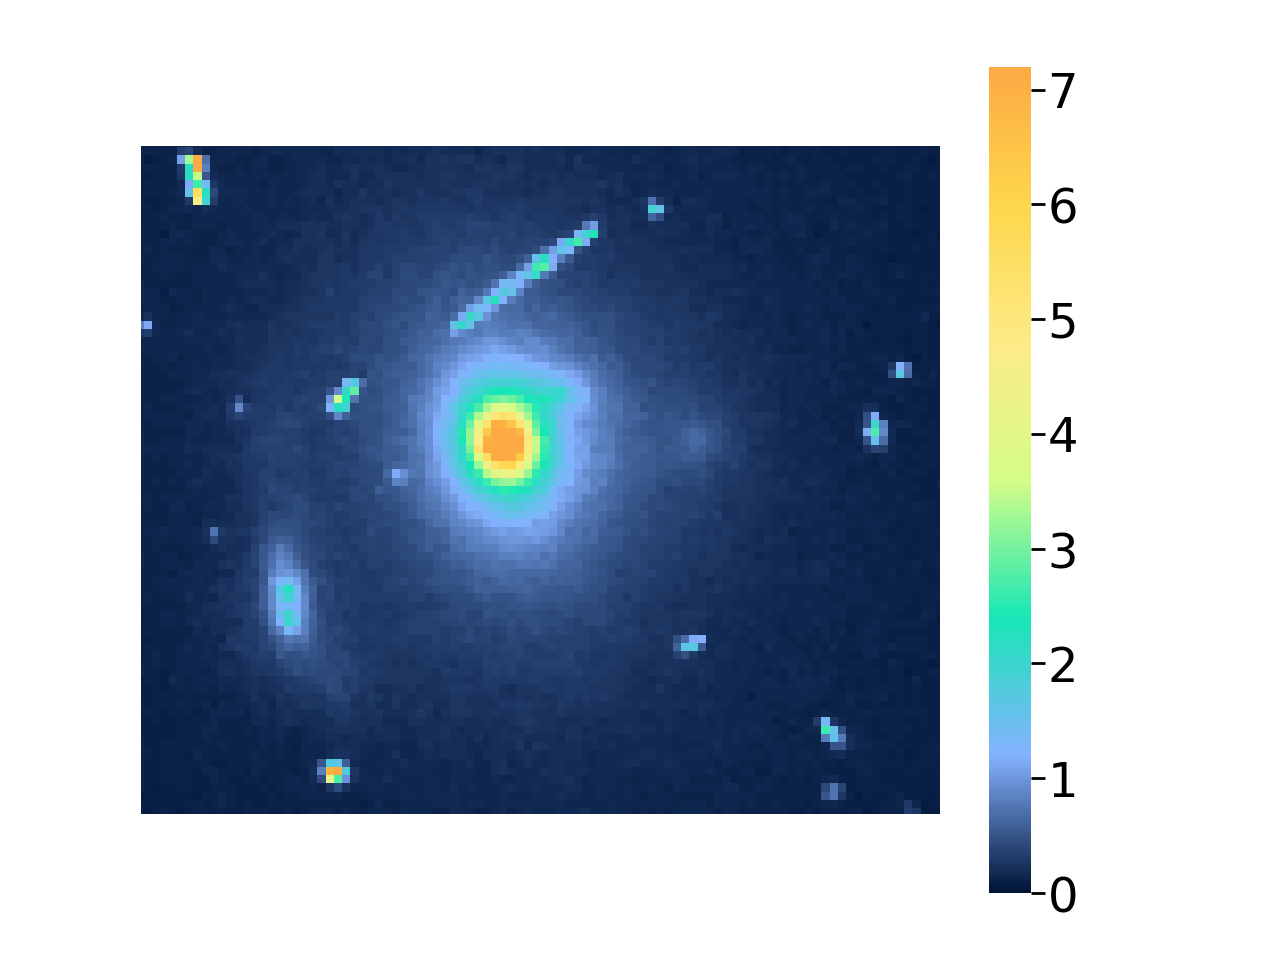

SEJveChjaGlsZHJlbj0oRHJvcGRvd24oZGVzY3JpcHRpb249dSdDb2xvcm1hcCcsIGluZGV4PTE4NiwgbGF5b3V0PUxheW91dCh3aWR0aD11JzEwMCUnKSwgb3B0aW9ucz0odSdBY2NlbnQnLCDigKY=


SEJveChjaGlsZHJlbj0oVGV4dGFyZWEodmFsdWU9dScnLCBkZXNjcmlwdGlvbj11J1BvaW50cycsIGxheW91dD1MYXlvdXQoaGVpZ2h0PXUnMjAwcHgnLCB3aWR0aD11Jzc1JScpLCBwbGFjZWjigKY=


In [8]:
%matplotlib notebook

fig, ax = plt.subplots()
fig, ax, plt_out = lo.plot_f(fig, ax=ax, cmap=gcl.GLEAMcmaps.vilux, colorbar=True,
                             vmin=0, vmax=0.5*np.max(lo.data), source_images=False,
                             deconv=False, psf=np.ones((3, 3))/25.)
clrbar = IPColorbar(plt_out[1], plt_out[0])
clrbar.connect()
cache = IPPointCache(plt_out[0])
cid = cache.connect()

In [9]:
if cache.xy:
    subj = cache.modes.index('L')
    lens_pos = cache.xy[subj]
    limg_pos = cache.xy[:subj] + cache.xy[subj+1:]
    
    print(lens_pos)
    print(limg_pos)

[99.03980145087604, 99.25848792149469]
[[72.65236671154312, 79.89156334216779], [122.52219750330991, 100.22683415046104]]


In [10]:
# add lens and lensed image positions to lens object
lo.lens = lens_pos
for img in limg_pos:
    lo.add_srcimg(img, unit='pixel', relative=True)
print(lo.lens.xy)
print(lo.srcimgs_xy)

[99.03980145054356, 99.25848792167079]
[[72.65236671216644, 79.89156334204313], [122.5221975035156, 100.22683415021731]]


In [11]:
# inspect lens-image separations
rel_pos = gleam.lensfinder.LensFinder.relative_positions(lo.srcimgs, lo.lens)
rel_dst = [np.sqrt(p[0]**2 + p[1]**2) for p in rel_pos]
print(rel_pos)
print(rel_dst)

[[-1.3195069105242225, -0.9683462289814315], [1.1742400947561422, 0.04841731142732897]]
[1.6367018378751022, 1.1752378636594232]


<IPython.core.display.Javascript object>


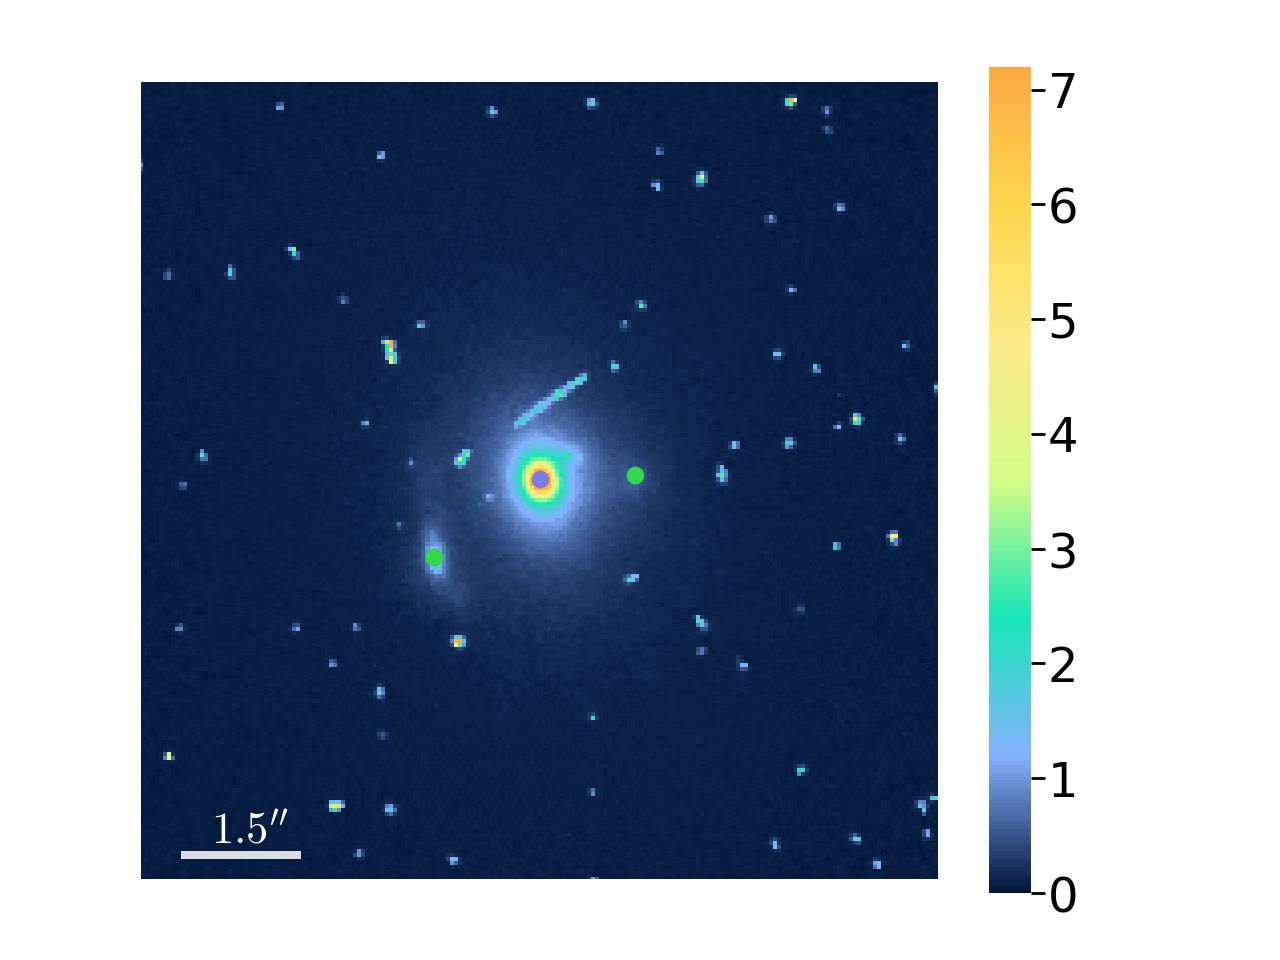

SEJveChjaGlsZHJlbj0oRHJvcGRvd24oZGVzY3JpcHRpb249dSdDb2xvcm1hcCcsIGluZGV4PTE4NiwgbGF5b3V0PUxheW91dCh3aWR0aD11JzEwMCUnKSwgb3B0aW9ucz0odSdBY2NlbnQnLCDigKY=


In [12]:
%matplotlib notebook

fig, ax = plt.subplots()
fig, ax, plt_out = lo.plot_f(fig, ax=ax, cmap=gcl.GLEAMcmaps.vilux, colorbar=True,
                             vmin=0, vmax=0.5*np.max(lo.data),
                             lens=True, source_images=True,
                             deconv=False, psf=np.ones((3, 3))/25.)
clrbar = IPColorbar(plt_out[1], plt_out[0])
clrbar.connect()

### Save GLASS configs

In [13]:
# %%script false
lo.glscfactory.sync_lens_params()
configs = lo.glscfactory.config['single']
print("".join(configs))

### Automatically generated GLASS config script for a single lens
###############################################################################
import os
import numpy as np

try:
    from Cocoa import NSSound
    from time import sleep
    sound = NSSound.alloc()
    sound.initWithContentsOfFile_byReference_('/System/Library/Sounds/Glass.aiff', True)
except ImportError:
    sound = False


### Meta info
dpath = ''
fname = 'SDSSJ1051+4439'
fpath = os.path.join(dpath, fname)
glass_basis('glass.basis.pixels', solver='rwalk')
meta(author='GLSCFactory', notes='single-config-mode')
setup_log(fpath+'.log')


### Sampler config
samplex_random_seed(0)
samplex_acceptance(rate=0.25, tol=0.15)

exclude_all_priors()
include_prior(
    'lens_eq',
    'time_delay',
    'profile_steepness',
    'J3gradient',
    'magnification',
#    'hubble_constant',
    'PLsmoothness3',
#   'shared_h',
#   'external_mass',
    'external_shear'
)


### Cosmology
omega(0.27, 0.73)
hubble_constant(72.032)
# hubble_t

In [14]:
# %%script false
savename = "{}.gls".format(lensname)
lo.glscfactory.write(filename=savename)